<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/Deep_Learning_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement a python program to recognise characters. Use MNIST dataset for the same.**

* Modified National Institute of Standards and Technology database.
* The dataset consists of a large collection of 28x28 grayscale images of handwritten digits from 0 to 9.
* These images are accompanied by corresponding labels indicating the actual digit represented by each image.

**Image Size and Format:**


The images in the MNIST dataset are grayscale, meaning they have only one channel (**black and white**). Each image has a resolution of 28x28 pixels, which makes them relatively small compared to modern datasets. The pixel values range from **0 to 255**, where **0 represents black and 255 represents white**.

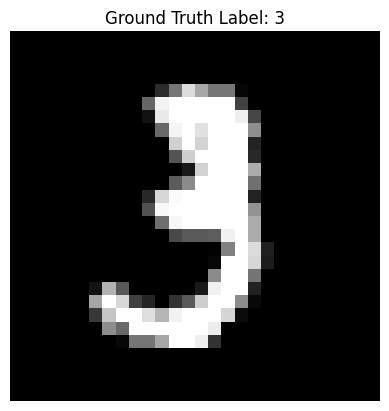

In [8]:
# Sample data
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

image_instance = 10

# Display the image
_image = train_images[image_instance]
ground_truth = train_labels[image_instance]

# Plot the image and show the ground truth label
plt.imshow(_image, cmap='gray')
plt.title(f"Ground Truth Label: {ground_truth}")
plt.axis('off')
plt.show()

In [9]:
print(f"The shape of a single image sample or example: {_image.shape}")

The shape of a single image sample or example: (28, 28)


**Number of Samples:**

The MNIST dataset contains a total of **70,000 samples**. These samples are divided into two main parts: the **training set and the test set**.


**Training Set:**


The training set consists of **60,000** images and their **corresponding labels**. These samples are used to train machine learning models to recognize and classify digits accurately. The training set is the part of the dataset that the model learns from.

**Test Set:**

The test set contains **10,000 images and labels**. After training the model using the training set, it is evaluated using the test set to assess its **performance and generalization capabilities**. The test set is a way to measure how well the model can **generalize to new, unseen data.**

In [11]:
print(f"The shape of the training set: {train_images.shape}")
print(f"The shape of the training labels: {train_labels.shape}")
print(f"The shape of the test set: {test_images.shape}")
print(f"The shape of the test labels: {test_labels.shape}")

The shape of the training set: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the test set: (10000, 28, 28)
The shape of the test labels: (10000,)


**Label Format:**


The labels in the MNIST dataset are integers from 0 to 9, representing the actual digits that the images depict. For example, the label '5' corresponds to an image of the handwritten digit 5.

# The steps we'll follow in this practical are as follows:

1.   Import necessary libraries (Keras and Tensor flow)
2.   Load and preprocess the MNIST dataset
3.   Build a neural network model using Keras
4.   Compile and train the model
5.   Evaluate the model on the test set

## **Step 1**: Import necessary libraries (**Keras and Tensor flow**)


* **TensorFlow**, the elder of the two, was created by a group of researchers and engineers working at **Google Brain** in 2011 designed to facilitate and streamline the development of **deep neural networks**.

* It quickly gained popularity due to its flexibility, scalability, and support for **distributed computing**.

*  Deep learning frameworks overly **complex and difficult to work with.**


* **Keras** was born out of the mind of **François Chollet**, a deep learning researcher and software engineer.

* François created Keras as a **high-level neural network API**, capable of running on top of different deep learning backends, including TensorFlow. Keras was later integrated into TensorFlow in 2017 as its **official high-level API.**

* TensorFlow provided the strong backbone and low-level capabilities, while Keras added a user-friendly interface that abstracted away much of the complexities of deep learning.



In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

## **Step 2**: Load and preprocess the MNIST dataset


In [22]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to a 1D vector (flatten)
train_images = train_images.reshape(train_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)


In [ ]:
print(f"The shape of train_images: {train_images.shape}")
print(f"The shape of train_images: {test_images.shape}")

## **Step 3**: Build a neural network model using Keras


## **Sequential**
* In Keras, Sequential is a class that represents a **linear stack of layers** in a neural network model.
* It is a convenient way to build a simple feedforward neural network, where **data flows sequentially** from the input layer through the hidden layers to the output layer.
* The Sequential class allows you to add layers one by one in a linear manner.

## **Dense**
* In Keras, Dense is one of the fundamental layers used to create fully connected neural networks.
* It is also known as a fully connected layer or a dense layer because each neuron in this layer is connected to every neuron in the previous and subsequent layers.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## **Step 4**: Compile and train the model

* In Keras, **model.compile()** is a method used to configure the training process for a neural network model.
* It is one of the essential steps before training a model as it defines the **optimizer, loss function, and metrics** that the model will use during the training process.

## **Optimizer**
* In Keras, **Adam is an optimization algorith**m that is widely used for training deep learning models.
* Adam stands for **Adaptive Moment Estimation**, and it combines the ideas of both Momentum and RMSprop algorithms.
* It is well-suited for **large-scale and complex problems** and is known for its efficiency, fast convergence, and robustness to noisy data.

## **Loss function**
* Suitable for: **Multi-class classification problems** with integer labels (not one-hot encoded).
* Formula:  - Σ(y_true * log(y_pred))
* Description: Sparse categorical crossentropy is used when the class labels are represented as integers instead of one-hot encoded vectors. It saves memory and is convenient when you have a large number of classes.

In [29]:
from tensorflow.keras.optimizers import Adam
# Create the model

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3590 - accuracy: 0.9010
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1729 - accuracy: 0.9509
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1231 - accuracy: 0.9646
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0940 - accuracy: 0.9730
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0759 - accuracy: 0.9783


## **Step 5**: Evaluate the model on the test set

In [31]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9727
Test accuracy: 0.9726999998092651


## Different neural architecture

In [32]:
def create_model_2():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(784,)),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model
model_2 = create_model_2()
model_2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluate the model on the test set
test_loss_2, test_accuracy_2 = model_2.evaluate(test_images, test_labels)
print(f"Architecture 2 - Test accuracy: {test_accuracy_2}")

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2575 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0952 - accuracy: 0.9711
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0634 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 5/5
313/313 [==============================] - 2s 2ms/step - loss: 0.0870 - accuracy: 0.9745
Architecture 2 - Test accuracy: 0.9745000004768372
